In [58]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [59]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [60]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


# Import Library


In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC

## Import Data

In [62]:
df=pd.read_csv("heart_2020_cleaned.csv")
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


In [63]:
# Memanggil 25 data dari keseluruhan data
df.head(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


## Data Understanding


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  int64  
 6   MentalHealth      319795 non-null  int64  
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  int64  
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [65]:
df.replace({"HeartDisease":{'No':0, 'Yes':1}}, inplace=True)
df.replace({"Smoking":{'No':0, 'Yes':1}}, inplace=True)
df.replace({"AlcoholDrinking":{'No':0, 'Yes':1}}, inplace=True)
df.replace({"Stroke":{'No':0, 'Yes':1}}, inplace=True)
df.replace({"DiffWalking":{'No':0, 'Yes':1}}, inplace=True)
df.replace({"Sex":{'Male':0, 'Female':1}}, inplace=True)
df.replace({"Diabetic":{'No':0, 'Yes':1, 'No, borderline diabetes':2, 'Yes (during pregnancy)':3 }}, inplace=True)
df.replace({"PhysicalActivity":{'No':0, 'Yes':1}}, inplace=True)
df.replace({"GenHealth":{'Excellent':1, 'Very good':2, 'Good':3, 'Fair':4, 'Poor':5}}, inplace=True)
df.replace({"Asthma":{'No':0, 'Yes':1}}, inplace=True)
df.replace({"KidneyDisease":{'No':0, 'Yes':1}}, inplace=True)
df.replace({"SkinCancer":{'No':0, 'Yes':1}}, inplace=True)
df.replace({"AgeCategory":{'18-24':1, '25-29':2, '30-34':3, '35-39':4, '40-44':5, '45-49':6, '50-54':7,'55-59':8, '60-64':9,'65-69':10, '70-74':11,'75-79':12, '80 or older':13}}, inplace=True)
df.replace({"Race":{'White':1, 'Black':2, 'American Indian/Alaskan Native':3, 'Asian':4, 'Hispanic':5, 'Other':6}}, inplace=True)


df.head(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3,30,0,1,8,1,1,1,2,5,1,0,1
1,0,20.34,0,0,1,0,0,0,1,13,1,0,1,2,7,0,0,0
2,0,26.58,1,0,0,20,30,0,0,10,1,1,1,4,8,1,0,0
3,0,24.21,0,0,0,0,0,0,1,12,1,0,0,3,6,0,0,1
4,0,23.71,0,0,0,28,0,1,1,5,1,0,1,2,8,0,0,0


In [66]:
x = df.drop('Race', axis=1)

In [67]:
print ("Data Shape: ", df.shape)

Data Shape:  (319795, 18)


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  int64  
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  int64  
 3   AlcoholDrinking   319795 non-null  int64  
 4   Stroke            319795 non-null  int64  
 5   PhysicalHealth    319795 non-null  int64  
 6   MentalHealth      319795 non-null  int64  
 7   DiffWalking       319795 non-null  int64  
 8   Sex               319795 non-null  int64  
 9   AgeCategory       319795 non-null  int64  
 10  Race              319795 non-null  int64  
 11  Diabetic          319795 non-null  int64  
 12  PhysicalActivity  319795 non-null  int64  
 13  GenHealth         319795 non-null  int64  
 14  SleepTime         319795 non-null  int64  
 15  Asthma            319795 non-null  int64  
 16  KidneyDisease     31

In [69]:
df.describe()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
count,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.00000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000
mean,0.085595,28.325399,0.412477,0.068097,0.037740,3.37171,3.898366,0.138870,0.524727,7.514536,1.694104,0.194002,0.775362,2.404972,7.097075,0.134061,0.036833,0.093244
std,0.279766,6.356100,0.492281,0.251912,0.190567,7.95085,7.955235,0.345812,0.499389,3.564759,1.452432,0.496776,0.417344,1.042918,1.436007,0.340718,0.188352,0.290775
min,0.000000,12.020000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,24.030000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,5.000000,1.000000,0.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000
50%,0.000000,27.340000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,8.000000,1.000000,0.000000,1.000000,2.000000,7.000000,0.000000,0.000000,0.000000
75%,0.000000,31.420000,1.000000,0.000000,0.000000,2.00000,3.000000,0.000000,1.000000,10.000000,1.000000,0.000000,1.000000,3.000000,8.000000,0.000000,0.000000,0.000000
max,1.000000,94.850000,1.000000,1.000000,1.000000,30.00000,30.000000,1.000000,1.000000,13.000000,6.000000,3.000000,1.000000,5.000000,24.000000,1.000000,1.000000,1.000000


In [70]:
df.HeartDisease.value_counts()

HeartDisease
0    292422
1     27373
Name: count, dtype: int64

##Cleaning Data

In [71]:
df.duplicated().sum()

18078

In [72]:
df = df.drop_duplicates()

In [73]:
df.duplicated().sum()

0

In [74]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [75]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3,30,0,1,8,1,1,1,2,5,1,0,1
1,0,20.34,0,0,1,0,0,0,1,13,1,0,1,2,7,0,0,0
2,0,26.58,1,0,0,20,30,0,0,10,1,1,1,4,8,1,0,0
3,0,24.21,0,0,0,0,0,0,1,12,1,0,0,3,6,0,0,1
4,0,23.71,0,0,0,28,0,1,1,5,1,0,1,2,8,0,0,0


## Exploratory Data Analysis (EDA)

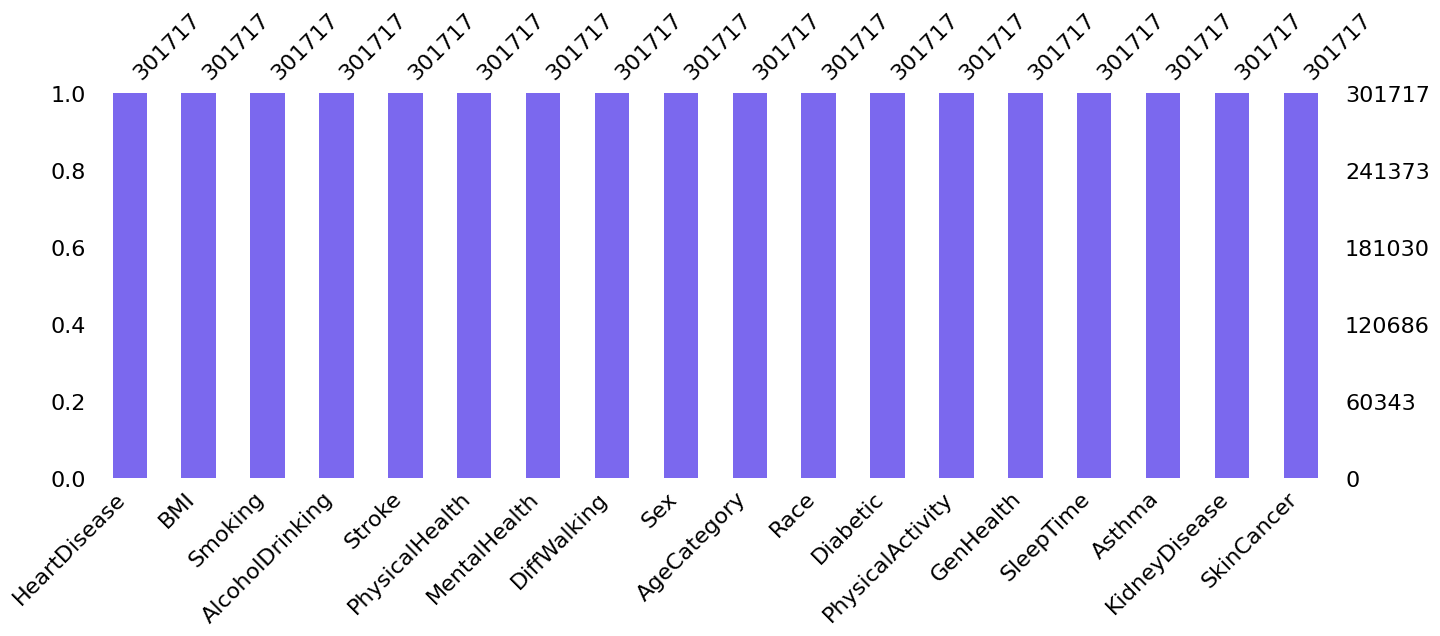

In [76]:
msno.bar(df, figsize = (16,5),color = "#7B68EE")
plt.show()

In [77]:
#melihat korelasi antar variabel data
df.corr()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
HeartDisease,1.000000,0.047260,0.104524,-0.036289,0.194665,0.165235,0.020913,0.196420,-0.074435,0.239259,-0.047409,0.119695,-0.093597,0.237920,0.010834,0.035784,0.142672,0.090644
BMI,0.047260,1.000000,0.015890,-0.043463,0.016314,0.103813,0.056724,0.177388,-0.024200,-0.006069,0.012706,0.165152,-0.144441,0.221339,-0.048653,0.087563,0.047796,-0.038060
Smoking,0.104524,0.015890,1.000000,0.109183,0.058868,0.110270,0.078364,0.115789,-0.087514,0.128259,-0.070906,0.033872,-0.089864,0.164441,-0.027874,0.017545,0.031890,0.030438
AlcoholDrinking,-0.036289,-0.043463,0.109183,1.000000,-0.022707,-0.023255,0.045421,-0.041135,-0.006824,-0.060761,-0.026971,-0.051565,0.024408,-0.039991,-0.003172,-0.007114,-0.031166,-0.008739
Stroke,0.194665,0.016314,0.058868,-0.022707,1.000000,0.132966,0.041324,0.170664,0.001343,0.141537,-0.019633,0.073034,-0.074898,0.164449,0.013697,0.034942,0.089109,0.046039
PhysicalHealth,0.165235,0.103813,0.110270,-0.023255,0.132966,1.000000,0.279657,0.422935,0.038427,0.114623,-0.009979,0.110271,-0.224121,0.480076,-0.058406,0.110083,0.138219,0.036753
MentalHealth,0.020913,0.056724,0.078364,0.045421,0.041324,0.279657,1.000000,0.142964,0.098916,-0.158608,0.014840,0.023699,-0.084274,0.230043,-0.117078,0.105266,0.032105,-0.040214
DiffWalking,0.196420,0.177388,0.115789,-0.041135,0.170664,0.422935,0.142964,1.000000,0.067335,0.250407,-0.011927,0.153223,-0.271748,0.409798,-0.019155,0.095826,0.149471,0.060596
Sex,-0.074435,-0.024200,-0.087514,-0.006824,0.001343,0.038427,0.098916,0.067335,1.000000,0.060620,-0.003698,0.032500,-0.045309,0.022366,0.014901,0.067960,0.007579,-0.015846
AgeCategory,0.239259,-0.006069,0.128259,-0.060761,0.141537,0.114623,-0.158608,0.250407,0.060620,1.000000,-0.203820,0.155818,-0.125294,0.192321,0.105025,-0.058823,0.126541,0.267930


**Koefisien korelasi adalah ukuran statistik yang menunjukkan kekuatan dan arah hubungan linier antara dua variabel. Kisarannya dari -1 hingga 1:**


*   -1: Korelasi negatif sempurna (jika satu variabel meningkat, variabel lainnya menurun secara proporsional)
*   0: Tidak ada korelasi linier
*   1: Korelasi positif sempurna (jika satu variabel meningkat, variabel lainnya meningkat secara proporsional)

<Axes: >

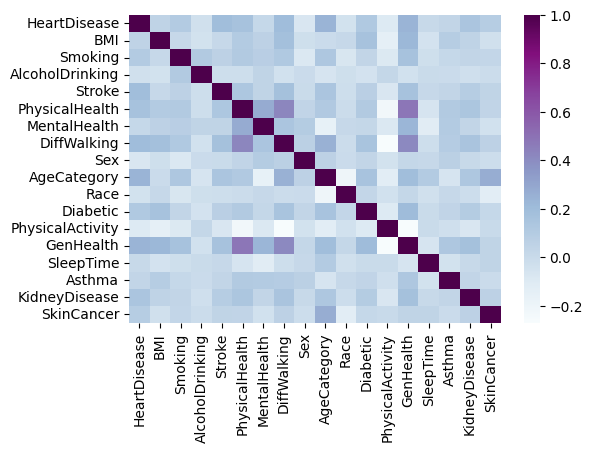

In [78]:
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(), cmap = 'BuPu')

semakin gelap warna, maka semakin kuat nilai korelasi antar variable data

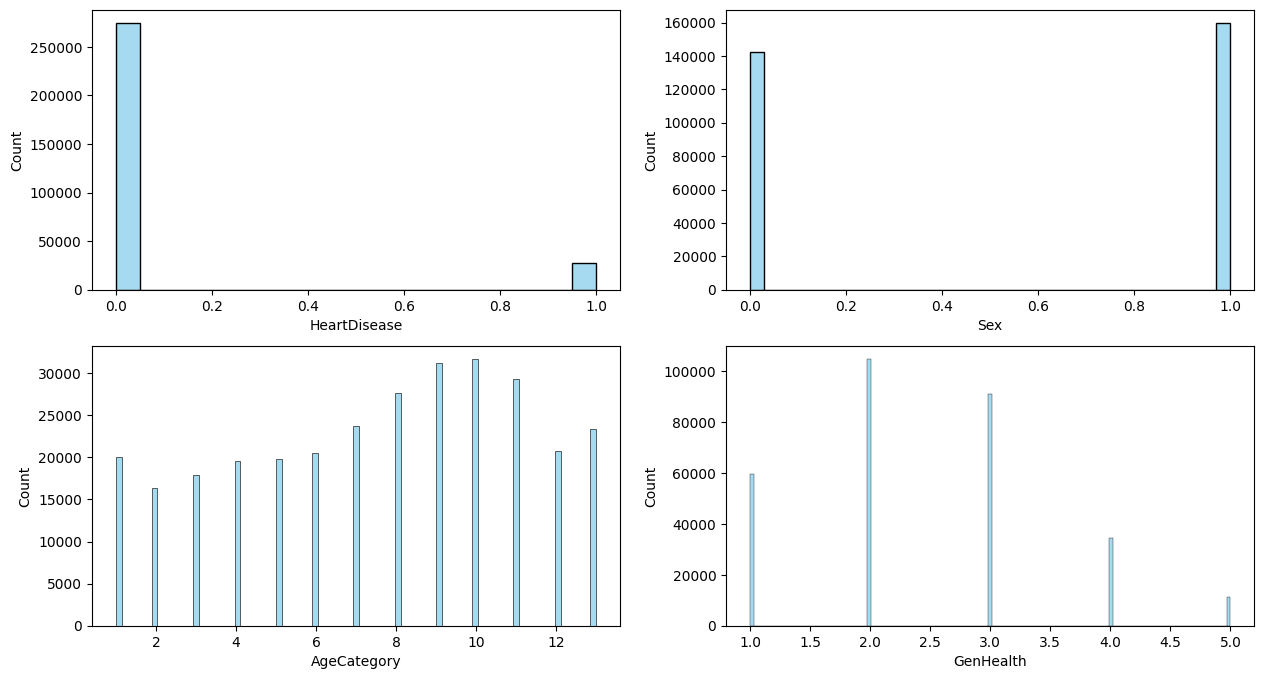

In [79]:
fig,axes = plt.subplots(2,2,figsize=(15,8))

sns.histplot(data=df,x='HeartDisease', ax=axes[0,0],color='skyblue')
sns.histplot(data=df,x='Sex', ax=axes[0,1],color='skyblue')
sns.histplot(data=df,x='AgeCategory', ax=axes[1,0],color='skyblue')
sns.histplot(data=df,x='GenHealth', ax=axes[1,1],color='skyblue')


plt.show()

In [80]:
#gambaran mengenai distribusi nilai dalam setiap kolom
for column_name in df.columns:
    unique_values = len(df[column_name].unique())
    print("Feature '{column_name}' has '{unique_values}' unique values".format(column_name = column_name,unique_values=unique_values))

Feature 'HeartDisease' has '2' unique values
Feature 'BMI' has '3604' unique values
Feature 'Smoking' has '2' unique values
Feature 'AlcoholDrinking' has '2' unique values
Feature 'Stroke' has '2' unique values
Feature 'PhysicalHealth' has '31' unique values
Feature 'MentalHealth' has '31' unique values
Feature 'DiffWalking' has '2' unique values
Feature 'Sex' has '2' unique values
Feature 'AgeCategory' has '13' unique values
Feature 'Race' has '6' unique values
Feature 'Diabetic' has '4' unique values
Feature 'PhysicalActivity' has '2' unique values
Feature 'GenHealth' has '5' unique values
Feature 'SleepTime' has '24' unique values
Feature 'Asthma' has '2' unique values
Feature 'KidneyDisease' has '2' unique values
Feature 'SkinCancer' has '2' unique values


Terlihat terdapat data outlier pada variabel BMI, namun karena data BMI ini penting jadi tidak akan di hapus data outlier ini

## Transformasi Data

In [81]:
# Scaling
## membantu meningkatkan performa model machine learning dan mempermudah interpretasi hasil model
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)
print(scaled_df)

[[-0.31516249 -1.83082001  1.169689   ...  2.46456684 -0.20153203
   3.04964275]
 [-0.31516249 -1.25259976 -0.8549281  ... -0.40575081 -0.20153203
  -0.32790726]
 [-0.31516249 -0.28786867  1.169689   ...  2.46456684 -0.20153203
  -0.32790726]
 ...
 [-0.31516249 -0.64964283 -0.8549281  ... -0.40575081 -0.20153203
  -0.32790726]
 [-0.31516249  0.67531639 -0.8549281  ... -0.40575081 -0.20153203
  -0.32790726]
 [-0.31516249  2.8011261  -0.8549281  ... -0.40575081 -0.20153203
  -0.32790726]]


## Fitur Selection


In [82]:
# Wrapper Methods
# Recursive Feature Elimination (RFE)

x = df.drop("HeartDisease", axis=1)
#x = df.drop ("Race", axis=1)
y = df["HeartDisease"]

# Memilih 10 fitur terbaik dengan RFE dan regresi linier
selector = RFE(estimator=LinearRegression(), n_features_to_select=10)
selected_features = selector.fit_transform(x, y)

# Melihat ranking fitur berdasarkan RFE
ranking = selector.ranking_

# Menampilkan nama fitur dan rankingnya
features_names = x.columns
for i, rank in enumerate(ranking):
    print(f"Fitur: {features_names[i]} - Ranking: {rank}")

Fitur: BMI - Ranking: 7
Fitur: Smoking - Ranking: 1
Fitur: AlcoholDrinking - Ranking: 1
Fitur: Stroke - Ranking: 1
Fitur: PhysicalHealth - Ranking: 4
Fitur: MentalHealth - Ranking: 8
Fitur: DiffWalking - Ranking: 1
Fitur: Sex - Ranking: 1
Fitur: AgeCategory - Ranking: 2
Fitur: Race - Ranking: 3
Fitur: Diabetic - Ranking: 1
Fitur: PhysicalActivity - Ranking: 6
Fitur: GenHealth - Ranking: 1
Fitur: SleepTime - Ranking: 5
Fitur: Asthma - Ranking: 1
Fitur: KidneyDisease - Ranking: 1
Fitur: SkinCancer - Ranking: 1


## METODE UNDERSAMPLING

C:\Users\M S I\AppData\Local\Temp\ipykernel_13104\1611175011.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='HeartDisease',data=df, palette='pastel')


<Axes: xlabel='HeartDisease', ylabel='count'>

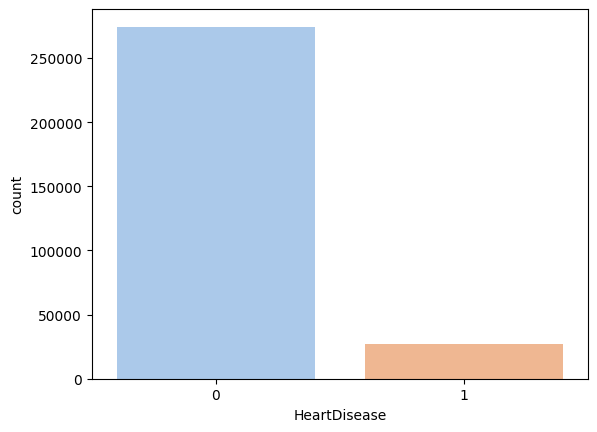

In [83]:
sns.countplot(x='HeartDisease',data=df, palette='pastel')

In [84]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.datasets import make_classification

# Generate a random imbalanced dataset
X, y = make_classification(n_classes=2, class_sep=2,
weights=[0.9, 0.1], n_informative=10,
n_redundant=7, flip_y=0, n_features=17,
n_clusters_per_class=1, n_samples=27000,
random_state=10)

# Initialize the RandomUnderSampler
rus = RandomUnderSampler(random_state=0)

# Fit and transform the dataset
X_resampled, y_resampled = rus.fit_resample(X, y)

# Print the number of samples in each class before and after resampling
print("Before resampling:")
print(np.bincount(y))
print("After resampling:")
print(np.bincount(y_resampled))

Before resampling:
[24300  2700]
After resampling:
[2700 2700]


In [85]:
x = df.drop(['HeartDisease'],axis=1) # x nya adalah atribut yang mempengaruhi penyakit jantung
y = df['HeartDisease'] # y nya adalah label itu sendiri

In [86]:
x = df.drop(['Race'], axis=1)

In [87]:
# sebelum undersampling
print(x.shape)
print(y.shape)

(301717, 17)
(301717,)


In [88]:
# jumlah data setelah dilakukan undersampling
print(X_resampled.shape)
print(y_resampled.shape)

(5400, 17)
(5400,)


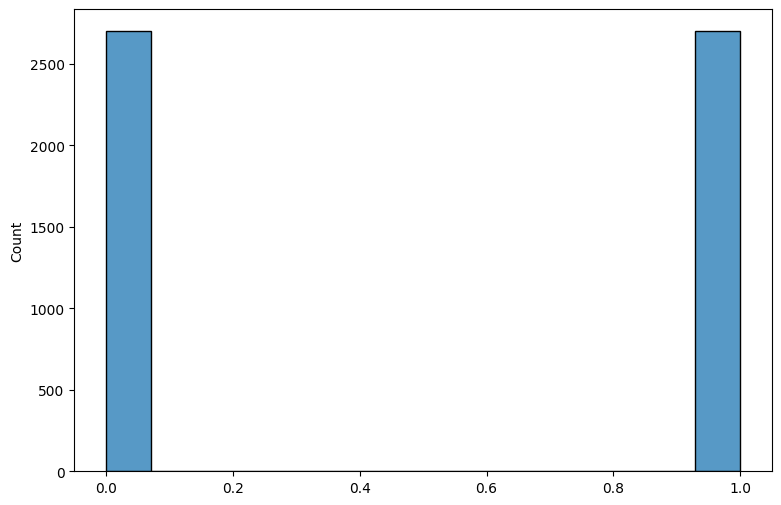

In [89]:
fig = plt.subplots(figsize=(9,6))
sns.histplot(data=y_resampled)
plt.show()


##Metode berhasil diterapkan, saat ini data penderita penyakit jantung sudah sama dengan yang tidak menderita penyakit jantung

## split data


In [90]:
X = df.drop(columns=['HeartDisease'])
y = df['HeartDisease']

print("X : ", X_resampled.shape)
print("y : ", y_resampled.shape)


X :  (5400, 17)
y :  (5400,)


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 301717 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      301717 non-null  int64  
 1   BMI               301717 non-null  float64
 2   Smoking           301717 non-null  int64  
 3   AlcoholDrinking   301717 non-null  int64  
 4   Stroke            301717 non-null  int64  
 5   PhysicalHealth    301717 non-null  int64  
 6   MentalHealth      301717 non-null  int64  
 7   DiffWalking       301717 non-null  int64  
 8   Sex               301717 non-null  int64  
 9   AgeCategory       301717 non-null  int64  
 10  Race              301717 non-null  int64  
 11  Diabetic          301717 non-null  int64  
 12  PhysicalActivity  301717 non-null  int64  
 13  GenHealth         301717 non-null  int64  
 14  SleepTime         301717 non-null  int64  
 15  Asthma            301717 non-null  int64  
 16  KidneyDisease     301717 

In [92]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [93]:
scaler = StandardScaler()

# Fit the scaler on the resampled data
scaler.fit(X_resampled)

# Transform the resampled data using the fitted scaler
X_transformed = scaler.transform(X_resampled)


In [94]:
from sklearn.model_selection import train_test_split

# Tentukan ukuran test set (misal: 20%)
test_size = 0.2

# Split data menjadi training set dan test set
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=test_size, random_state=42)


## Modelling SVM (support vector machine)

In [95]:
clf = SVC(kernel = 'linear')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
CLF_acc = accuracy_score(y_pred, y_test)

print(classification_report(y_test, y_pred))
print("Akurasi SVM : {:.2f}%".format(CLF_acc*100))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       557
           1       0.99      1.00      0.99       523

    accuracy                           0.99      1080
   macro avg       0.99      0.99      0.99      1080
weighted avg       0.99      0.99      0.99      1080

Akurasi SVM : 99.26%


In [96]:
clf = SVC(kernel = 'poly' , degree=3, C=1.0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
CLF_acc = accuracy_score(y_pred, y_test)

print(classification_report(y_test, y_pred))
print("Akurasi SVM : {:.2f}%".format(CLF_acc*100))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       557
           1       0.99      1.00      1.00       523

    accuracy                           1.00      1080
   macro avg       1.00      1.00      1.00      1080
weighted avg       1.00      1.00      1.00      1080

Akurasi SVM : 99.54%


In [97]:
clf = SVC(kernel = 'sigmoid' , gamma=1.0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
CLF_acc = accuracy_score(y_pred, y_test)

print(classification_report(y_test, y_pred))
print("Akurasi SVM : {:.2f}%".format(CLF_acc*100))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       557
           1       0.82      0.86      0.84       523

    accuracy                           0.84      1080
   macro avg       0.84      0.84      0.84      1080
weighted avg       0.84      0.84      0.84      1080

Akurasi SVM : 83.80%


In [98]:
clf = SVC(kernel = 'rbf' , gamma=0.1)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
CLF_acc = accuracy_score(y_pred, y_test)

print(classification_report(y_test, y_pred))
print("Akurasi SVM : {:.2f}%".format(CLF_acc*100))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       557
           1       0.96      1.00      0.98       523

    accuracy                           0.98      1080
   macro avg       0.98      0.98      0.98      1080
weighted avg       0.98      0.98      0.98      1080

Akurasi SVM : 97.96%


In [99]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Assuming your data is stored in X and target variable in y
X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)  # Split data for training and validation

# Define your SVM model with polynomial kernel
clf = SVC(kernel='poly', degree=3, C=1.0)

# Train the SVM model
clf.fit(X_train, y_train)

# Make predictions on validation data
y_pred_val = clf.predict(X_val)

# Calculate val_accuracy
val_accuracy = accuracy_score(y_val, y_pred_val)
print("Validation Accuracy:", val_accuracy)

# Make predictions on test data (optional)
y_pred_test = clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", test_accuracy)

# You can also use classification_report on validation data
print(classification_report(y_val, y_pred_val))


Validation Accuracy: 0.9953703703703703
Test Accuracy: 0.9953703703703703
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       557
           1       0.99      1.00      1.00       523

    accuracy                           1.00      1080
   macro avg       1.00      1.00      1.00      1080
weighted avg       1.00      1.00      1.00      1080



K-FOLD

In [100]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC

# Definisikan jumlah fold
n_splits = 5

# Inisialisasi StratifiedKFold
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Inisialisasi model
model = SVC(kernel='linear')

# List untuk menyimpan hasil akurasi tiap fold
accuracies = []

# Loop melalui setiap fold
for train_index, val_index in skf.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
    
    # Train the model
    model.fit(X_train_fold, y_train_fold)
    
    # Predict the validation set
    y_val_pred = model.predict(X_val_fold)
    
    # Evaluate the model
    accuracy = accuracy_score(y_val_fold, y_val_pred)
    accuracies.append(accuracy)
    
    print(f'Fold Accuracy: {accuracy}')
    print(classification_report(y_val_fold, y_val_pred))

# Print the average accuracy across all folds
print(f'Average Accuracy: {np.mean(accuracies)}')

# Evaluate the final model on the test set
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)

print(f'Test Accuracy: {accuracy_score(y_test, y_test_pred)}')
print(classification_report(y_test, y_test_pred))


Fold Accuracy: 0.9976851851851852
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       428
           1       1.00      1.00      1.00       436

    accuracy                           1.00       864
   macro avg       1.00      1.00      1.00       864
weighted avg       1.00      1.00      1.00       864

Fold Accuracy: 0.9976851851851852
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       428
           1       1.00      1.00      1.00       436

    accuracy                           1.00       864
   macro avg       1.00      1.00      1.00       864
weighted avg       1.00      1.00      1.00       864

Fold Accuracy: 0.9976851851851852
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       429
           1       1.00      1.00      1.00       435

    accuracy                           1.00       864
   macro avg       1.00   

In [101]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC

# Definisikan jumlah fold
n_splits = 5

# Inisialisasi StratifiedKFold
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Inisialisasi model
model = SVC(kernel='poly')

# List untuk menyimpan hasil akurasi tiap fold
accuracies = []

# Loop melalui setiap fold
for train_index, val_index in skf.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
    
    # Train the model
    model.fit(X_train_fold, y_train_fold)
    
    # Predict the validation set
    y_val_pred = model.predict(X_val_fold)
    
    # Evaluate the model
    accuracy = accuracy_score(y_val_fold, y_val_pred)
    accuracies.append(accuracy)
    
    print(f'Fold Accuracy: {accuracy}')
    print(classification_report(y_val_fold, y_val_pred))

# Print the average accuracy across all folds
print(f'Average Accuracy: {np.mean(accuracies)}')

# Evaluate the final model on the test set
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)

print(f'Test Accuracy: {accuracy_score(y_test, y_test_pred)}')
print(classification_report(y_test, y_test_pred))


Fold Accuracy: 0.9988425925925926
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       428
           1       1.00      1.00      1.00       436

    accuracy                           1.00       864
   macro avg       1.00      1.00      1.00       864
weighted avg       1.00      1.00      1.00       864

Fold Accuracy: 0.9965277777777778
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       428
           1       1.00      1.00      1.00       436

    accuracy                           1.00       864
   macro avg       1.00      1.00      1.00       864
weighted avg       1.00      1.00      1.00       864

Fold Accuracy: 0.9988425925925926
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       429
           1       1.00      1.00      1.00       435

    accuracy                           1.00       864
   macro avg       1.00   

In [102]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC

# Definisikan jumlah fold
n_splits = 5

# Inisialisasi StratifiedKFold
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Inisialisasi model
model = SVC(kernel='sigmoid')

# List untuk menyimpan hasil akurasi tiap fold
accuracies = []

# Loop melalui setiap fold
for train_index, val_index in skf.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
    
    # Train the model
    model.fit(X_train_fold, y_train_fold)
    
    # Predict the validation set
    y_val_pred = model.predict(X_val_fold)
    
    # Evaluate the model
    accuracy = accuracy_score(y_val_fold, y_val_pred)
    accuracies.append(accuracy)
    
    print(f'Fold Accuracy: {accuracy}')
    print(classification_report(y_val_fold, y_val_pred))

# Print the average accuracy across all folds
print(f'Average Accuracy: {np.mean(accuracies)}')

# Evaluate the final model on the test set
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)

print(f'Test Accuracy: {accuracy_score(y_test, y_test_pred)}')
print(classification_report(y_test, y_test_pred))


Fold Accuracy: 0.9409722222222222
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       428
           1       0.94      0.94      0.94       436

    accuracy                           0.94       864
   macro avg       0.94      0.94      0.94       864
weighted avg       0.94      0.94      0.94       864

Fold Accuracy: 0.9537037037037037
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       428
           1       0.97      0.94      0.95       436

    accuracy                           0.95       864
   macro avg       0.95      0.95      0.95       864
weighted avg       0.95      0.95      0.95       864

Fold Accuracy: 0.9351851851851852
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       429
           1       0.94      0.94      0.94       435

    accuracy                           0.94       864
   macro avg       0.94   

In [103]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC

# Definisikan jumlah fold
n_splits = 5

# Inisialisasi StratifiedKFold
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Inisialisasi model
model = SVC(kernel='rbf')

# List untuk menyimpan hasil akurasi tiap fold
accuracies = []

# Loop melalui setiap fold
for train_index, val_index in skf.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
    
    # Train the model
    model.fit(X_train_fold, y_train_fold)
    
    # Predict the validation set
    y_val_pred = model.predict(X_val_fold)
    
    # Evaluate the model
    accuracy = accuracy_score(y_val_fold, y_val_pred)
    accuracies.append(accuracy)
    
    print(f'Fold Accuracy: {accuracy}')
    print(classification_report(y_val_fold, y_val_pred))

# Print the average accuracy across all folds
print(f'Average Accuracy: {np.mean(accuracies)}')

# Evaluate the final model on the test set
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)

print(f'Test Accuracy: {accuracy_score(y_test, y_test_pred)}')
print(classification_report(y_test, y_test_pred))


Fold Accuracy: 0.9976851851851852
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       428
           1       1.00      1.00      1.00       436

    accuracy                           1.00       864
   macro avg       1.00      1.00      1.00       864
weighted avg       1.00      1.00      1.00       864

Fold Accuracy: 0.9976851851851852
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       428
           1       1.00      1.00      1.00       436

    accuracy                           1.00       864
   macro avg       1.00      1.00      1.00       864
weighted avg       1.00      1.00      1.00       864

Fold Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       429
           1       1.00      1.00      1.00       435

    accuracy                           1.00       864
   macro avg       1.00      1.00      1.

Testing kernel: linear
Fold Accuracy for kernel linear: 0.9976851851851852
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       428
           1       1.00      1.00      1.00       436

    accuracy                           1.00       864
   macro avg       1.00      1.00      1.00       864
weighted avg       1.00      1.00      1.00       864

Fold Accuracy for kernel linear: 0.9976851851851852
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       428
           1       1.00      1.00      1.00       436

    accuracy                           1.00       864
   macro avg       1.00      1.00      1.00       864
weighted avg       1.00      1.00      1.00       864

Fold Accuracy for kernel linear: 0.9976851851851852
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       429
           1       1.00      1.00      1.00       435

   

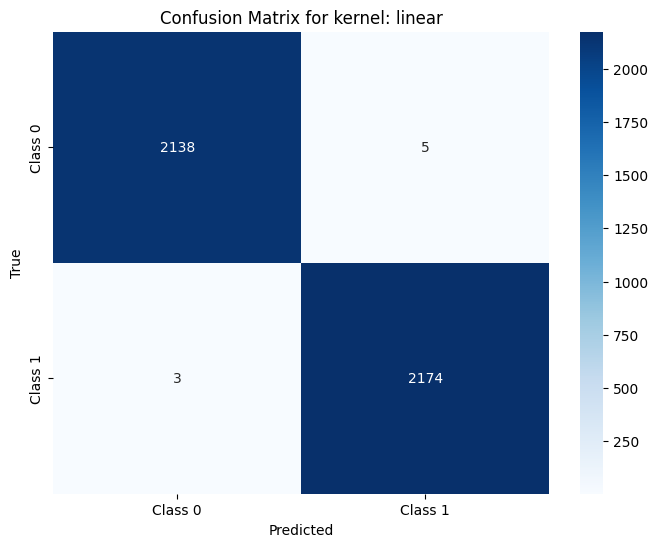

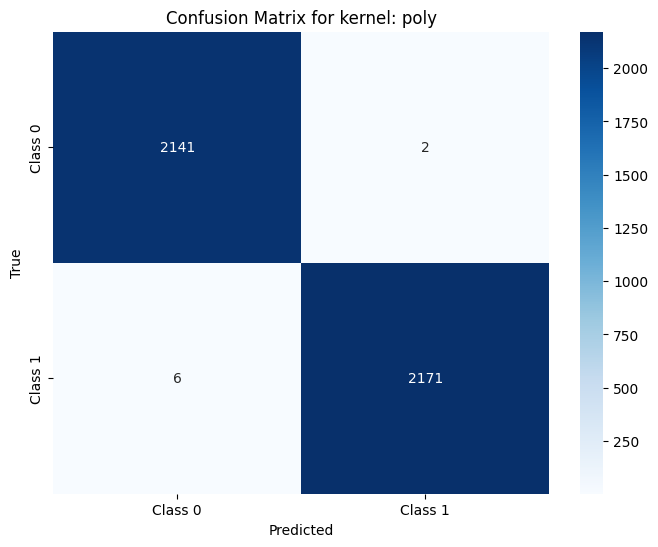

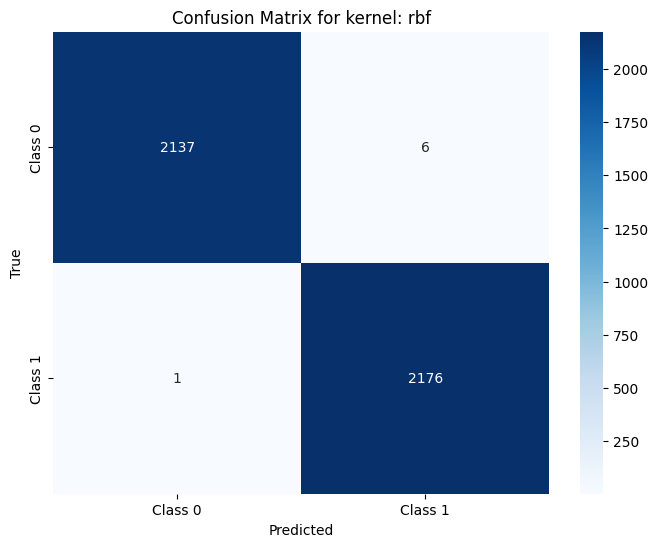

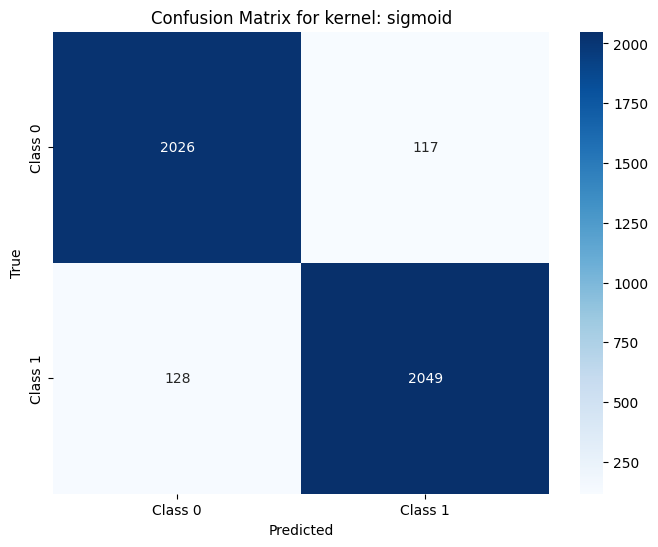

Best kernel: rbf with average accuracy: 0.9983796296296296
Test Accuracy for kernel rbf: 0.9962962962962963
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       557
           1       0.99      1.00      1.00       523

    accuracy                           1.00      1080
   macro avg       1.00      1.00      1.00      1080
weighted avg       1.00      1.00      1.00      1080



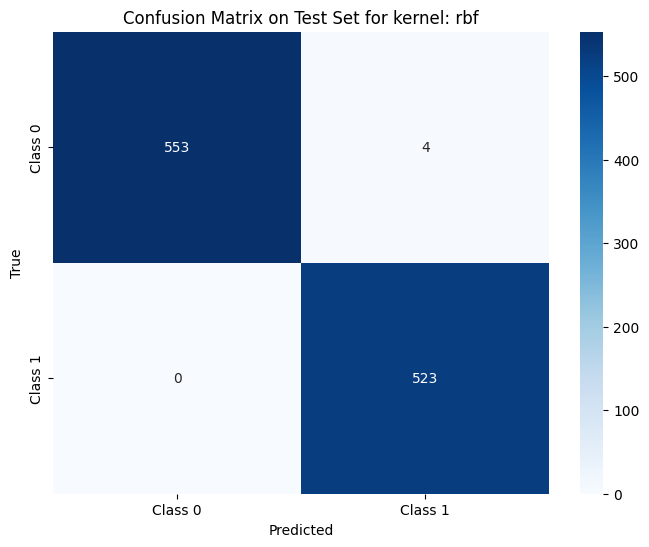

In [104]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns

# Define kernels to be tested
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# Inisialisasi StratifiedKFold
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Dictionary to store results
results = {kernel: {'accuracies': [], 'y_true': [], 'y_pred': []} for kernel in kernels}

# Loop through each kernel
for kernel in kernels:
    print(f'Testing kernel: {kernel}')
    
    # Initialize model with the current kernel
    model = SVC(kernel=kernel)
    
    # Loop through each fold
    for train_index, val_index in skf.split(X_train, y_train):
        X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
        
        # Train the model
        model.fit(X_train_fold, y_train_fold)
        
        # Predict the validation set
        y_val_pred = model.predict(X_val_fold)
        
        # Store true and predicted values
        results[kernel]['y_true'].extend(y_val_fold)
        results[kernel]['y_pred'].extend(y_val_pred)
        
        # Evaluate the model
        accuracy = accuracy_score(y_val_fold, y_val_pred)
        results[kernel]['accuracies'].append(accuracy)
        
        print(f'Fold Accuracy for kernel {kernel}: {accuracy}')
        print(classification_report(y_val_fold, y_val_pred))
    
    # Print the average accuracy for the current kernel
    avg_accuracy = np.mean(results[kernel]['accuracies'])
    print(f'Average Accuracy for kernel {kernel}: {avg_accuracy}\n')

# Plot confusion matrix for each kernel
for kernel in kernels:
    cm = confusion_matrix(results[kernel]['y_true'], results[kernel]['y_pred'])
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for kernel: {kernel}')
    plt.show()

# Choose the best kernel based on average accuracy
best_kernel = max(results, key=lambda k: np.mean(results[k]['accuracies']))
print(f'Best kernel: {best_kernel} with average accuracy: {np.mean(results[best_kernel]["accuracies"])}')

# Train the final model with the best kernel on the entire training set
final_model = SVC(kernel=best_kernel)
final_model.fit(X_train, y_train)

# Predict and evaluate on the test set
y_test_pred = final_model.predict(X_test)
print(f'Test Accuracy for kernel {best_kernel}: {accuracy_score(y_test, y_test_pred)}')
print(classification_report(y_test, y_test_pred))

# Plot confusion matrix for the test set
cm_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix on Test Set for kernel: {best_kernel}')
plt.show()


## Testing

In [105]:
new_data = {
    'BMI'	: [16.6],
    'Smoking'	: [1],
    'AlcoholDrinking' : [0],
    'Stroke'	: [0],
    'PhysicalHealth' : [3],
    'MentalHealth'	: [30],
    'DiffWalking'	: [0],
    'Sex'	: [1],
    'AgeCategory' : [8],
    'Race' : [1],
    'Diabetic' : [1],
    'PhysicalActivity' : [1],
    'GenHealth'	: [2],
    'SleepTime'	: [5],
    'Asthma'	: [1],
    'KidneyDisease'	: [0],
    'SkinCancer' : [1]
}

new_data = pd.DataFrame(new_data)
new_data

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,16.6,1,0,0,3,30,0,1,8,1,1,1,2,5,1,0,1


In [106]:
scaled_new_data = scaler.transform(new_data)
y_pred_new = clf.predict(scaled_new_data)

print("Diagnosis Data Baru : ", y_pred_new)

Diagnosis Data Baru :  [0]


c:\Users\M S I\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [107]:
new_data = {
    'BMI'	: [10.0],
    'Smoking'	: [1],
    'AlcoholDrinking' : [1],
    'Stroke'	: [1],
    'PhysicalHealth' : [9],
    'MentalHealth'	: [10],
    'DiffWalking'	: [1],
    'Sex'	: [1],
    'AgeCategory' : [12],
    'Race' : [1],
    'Diabetic' : [1],
    'PhysicalActivity' : [0],
    'GenHealth'	: [4],
    'SleepTime'	: [2],
    'Asthma'	: [1],
    'KidneyDisease'	: [1],
    'SkinCancer' : [1]
}

new_data = pd.DataFrame(new_data)
new_data

scaled_new_data = scaler.transform(new_data)
y_pred_new = clf.predict(scaled_new_data)

print("Diagnosis Data Baru : ", y_pred_new)

Diagnosis Data Baru :  [0]


c:\Users\M S I\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [108]:
new_data = {
    'BMI'	: [34.3],
    'Smoking'	: [0],
    'AlcoholDrinking' : [0],
    'Stroke'	: [1],
    'PhysicalHealth' : [50],
    'MentalHealth'	: [50],
    'DiffWalking'	: [1],
    'Sex'	: [1],
    'AgeCategory' : [1],
    'Race' : [1],
    'Diabetic' : [0],
    'PhysicalActivity' : [1],
    'GenHealth'	: [2],
    'SleepTime'	: [5],
    'Asthma'	: [0],
    'KidneyDisease'	: [0],
    'SkinCancer' : [0]
}

new_data = pd.DataFrame(new_data)
new_data

scaled_new_data = scaler.transform(new_data)
y_pred_new = clf.predict(scaled_new_data)

print("Diagnosis Data Baru : ", y_pred_new)

Diagnosis Data Baru :  [0]


c:\Users\M S I\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [109]:
import pickle

In [110]:
from sklearn.preprocessing import StandardScaler

In [111]:
scaler = StandardScaler()
scaler.fit(X_train)
X = scaler.transform(X)

In [112]:
data_diskalakan_uji = scaler.transform(X_test)

In [113]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

# Assuming you have your training and testing data (X_train, X_test, y_train, y_test)

# Create the model pipeline
model_numpy = make_pipeline(StandardScaler(), LinearSVC())

# Train the model
model_numpy.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model_numpy.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

# Save the trained model (replace with your preferred filename)
with open("model_numpy.pkl", "wb") as model_file:
    pickle.dump(model_numpy, model_file)


c:\Users\M S I\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\M S I\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


              precision    recall  f1-score   support

           0       1.00      0.99      0.99       557
           1       0.99      1.00      0.99       523

    accuracy                           0.99      1080
   macro avg       0.99      0.99      0.99      1080
weighted avg       0.99      0.99      0.99      1080



In [114]:
#load model
with open('model_numpy.pkl', 'rb') as model_file:
    model = pickle.load(model_file)